**Taxonomy**

In [43]:
# base library imports 
import pandas as pd
import matplotlib as mpl
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as prepro
from sklearn.metrics import jaccard_similarity_score

%matplotlib inline

In [2]:
# loading the csv file
import os 
os.getcwd()
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.CRITICAL)
x_file = 'C:/Users/pc/Documents/taxonomy/epfl_courses_utf8.csv'

df = pd.read_csv(x_file, encoding='utf-8')

In [3]:
# random seed and number of topics
seed = 0 
num_groupes = 26

In [4]:
df.columns


Index(['course', 'code', 'description'], dtype='object')

In [5]:
# adding course titles to descriptions in order to make description comprhensive
df['description'] = df['course'] + ' ' + df['description']

In [6]:
df['description']


0       Accounting for finance The objective of the co...
1       Advanced algorithms A first graduate course in...
2       Advanced analog and RF integrated circuits des...
3       Advanced analog and RF integrated circuits des...
4       Advanced analysis I Getting access to the conc...
5       Advanced analysis II Getting access to the use...
6       Advanced bioengineering methods laboratory Adv...
7       Advanced compiler construction Students learn ...
8       Advanced composites in engineering structures ...
9       Advanced computer architecture The course stud...
10      Advanced computer graphics This course covers ...
11      Advanced control systems This course covers so...
12      Advanced cryptography This course reviews some...
13      Advanced derivatives The course covers a wide ...
14      Advanced diffusional separation processes Desi...
15      Advanced digital communications Digital commun...
16      Advanced energetics Methods for the rational u...
17      Advanc

In [7]:
df['course'].head()

0                               Accounting for finance
1                                  Advanced algorithms
2    Advanced analog and RF integrated circuits des...
3    Advanced analog and RF integrated circuits des...
4                                  Advanced analysis I
Name: course, dtype: object

In [8]:
df['code'].head()

0     FIN-411
1      CS-450
2      EE-520
3      EE-521
4    MATH-400
Name: code, dtype: object

In [9]:
# extract faculty names from course code
df['faculty'] = df['code'].map(lambda x: str(x).split('-', 1)[0])
df['faculty']

0          FIN
1           CS
2           EE
3           EE
4         MATH
5         MATH
6       BIOENG
7           CS
8        CIVIL
9           CS
10          CS
11          ME
12         COM
13         FIN
14         ChE
15         COM
16          ME
17          ME
18          CS
19         COM
20          EE
21          EE
22          EE
23       MICRO
24          CH
25       MICRO
26         MSE
27       CIVIL
28          CS
29         MSE
         ...  
1728        AR
1729        AR
1730        AR
1731        AR
1732        AR
1733        AR
1734        AR
1735        AR
1736       ETH
1737       HUM
1738       HUM
1739       BIO
1740        CS
1741     CIVIL
1742        AR
1743        AR
1744       FIN
1745        AR
1746        AR
1747     CIVIL
1748        CS
1749        AR
1750     CIVIL
1751       ENV
1752       ENG
1753       ENV
1754        EE
1755       ETH
1756        EE
1757       MSE
Name: faculty, dtype: object

1758

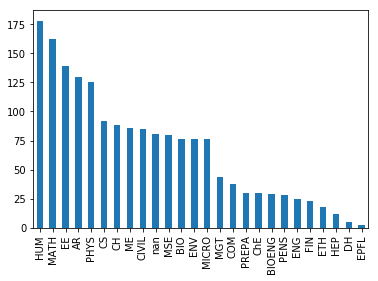

In [10]:
# Number of subject offered by faculties
fig, ax = plt.subplots()
df['faculty'].value_counts().plot(ax=ax, kind='bar')
df['faculty'].value_counts().sum()

In [11]:
# creating unique code  for each faculty
df.faculty = pd.Categorical(df.faculty)
df['fac_code'] = df.faculty.cat.codes
df.fac_code.unique()

array([14,  6,  9, 17,  2,  4, 18,  5,  7, 20,  3, 21, 11, 13, 16, 24, 15,
       19,  0, 22, 23, 25,  1, 10,  8, 12], dtype=int64)

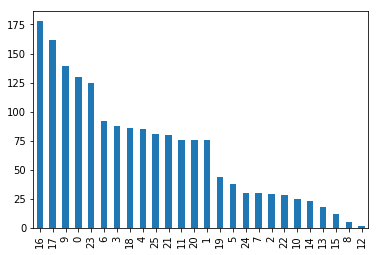

In [12]:
# histogram of the faculty codes
fig, ax = plt.subplots()
df['fac_code'].value_counts().plot(ax=ax, kind='bar')

In [13]:
# remove rows with null value
df_dropna = df.dropna(axis=0, how='any')
df_dropna.shape


(1595, 5)

In [14]:
# extracting each column for further refinement
df_name = df_dropna.ix[:,0]
df_desc = df_dropna.ix[:,2]
df_fac = df_dropna.ix[:,3]
df_fac_code = df_dropna.ix[:,4]

In [15]:
# refining course descriptions by replacing special characters with space
df_name_refined = []
df_desc_refined = []
df_fac_refined = []
df_fac_code_refined = []

for item in df_fac:
    df_fac_refined.append (item)
for item in df_name:
    df_name_refined.append (item)
for item in df_fac_code:
    df_fac_code_refined.append (item)
for item in df_desc:
    df_desc_refined.append (item.replace('\r',' ').replace('/n',' ').replace('.',' ').replace(',',' ').replace('(',' ')\
                                             .replace(')',' ').replace("'s",' ').replace('"',' ')\
                                             .replace('!',' ').replace('?',' ').replace("'",' ')\
                                             .replace('>',' ').replace('$',' ')\
                                             .replace('-',' ').replace(';',' ')\
                                             .replace(':',' ').replace('/',' ').replace('#',' '))

In [16]:
len(df_desc_refined)


1595

In [17]:
#checking
i = 10
print(df_name_refined[i], ':', df_desc_refined[i], ':', df_fac_refined[i])

Advanced computer graphics : Advanced computer graphics This course covers advanced 3D graphics techniques for realistic image synthesis  Students will learn how light interacts with objects in our world  and how to recreate these phenomena in a computer simulation to create synthetic images that are indistinguishable from photographs  : CS


In [18]:
# creating a corpus class with an iterator that reads one corpus document per line without loading all into memory
from gensim import corpora
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import enchant

eng_dic = enchant.Dict("en_US")
tester = 1
lemmatizer = WordNetLemmatizer()
documents = df_desc_refined
print ('original: ',documents[tester], '\n')

C:\Users\pc\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


original:  Advanced algorithms A first graduate course in algorithms  this course assumes minimal background  but moves rapidly  The objective is to learn the main techniques of algorithm analysis and design  while building a repertory of basic algorithmic solutions to problems in many domains  



In [19]:
# remove stop words and tokenize
documents_no_stop = [[word for word in document.lower().split() if word not in STOPWORDS]
         for document in documents]

print ('tokenize and remove stop words: ',documents_no_stop[tester], '\n')

tokenize and remove stop words:  ['advanced', 'algorithms', 'graduate', 'course', 'algorithms', 'course', 'assumes', 'minimal', 'background', 'moves', 'rapidly', 'objective', 'learn', 'main', 'techniques', 'algorithm', 'analysis', 'design', 'building', 'repertory', 'basic', 'algorithmic', 'solutions', 'problems', 'domains'] 



In [20]:
# remove words that appear only once
from collections import defaultdict
threshold = 1 # frequency threshold
frequency = defaultdict(int)
for text in documents_no_stop:
    for token in text:
        frequency[token] += 1

documents_no_stop_no_unique = [[token for token in text if frequency[token] > threshold] 
                               for text in documents_no_stop]

print ('remove unique words: ',documents_no_stop_no_unique[tester], '\n')

remove unique words:  ['advanced', 'algorithms', 'graduate', 'course', 'algorithms', 'course', 'background', 'moves', 'rapidly', 'objective', 'learn', 'main', 'techniques', 'algorithm', 'analysis', 'design', 'building', 'repertory', 'basic', 'algorithmic', 'solutions', 'problems', 'domains'] 



In [24]:
# remove all numerics and tokens with numebrs
import re
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))
documents_no_stop_no_unique_no_numeric = [[token for token in text if not (hasNumbers(token)) ] 
                                          for text in documents_no_stop_no_unique]

print ('remove numerics: ',documents_no_stop_no_unique_no_numeric[tester], '\n')

remove numerics:  ['advanced', 'algorithms', 'graduate', 'course', 'algorithms', 'course', 'background', 'moves', 'rapidly', 'objective', 'learn', 'main', 'techniques', 'algorithm', 'analysis', 'design', 'building', 'repertory', 'basic', 'algorithmic', 'solutions', 'problems', 'domains'] 



In [27]:
# lemmattizing tokens 
documents_no_stop_no_unique_no_numeric_lemmatize = [[lemmatizer.lemmatize(token) for token in text] 
                                                    for text in documents_no_stop_no_unique_no_numeric]

print ('lemmatize: ',documents_no_stop_no_unique_no_numeric_lemmatize[tester], '\n')

lemmatize:  ['advanced', 'algorithm', 'graduate', 'course', 'algorithm', 'course', 'background', 'move', 'rapidly', 'objective', 'learn', 'main', 'technique', 'algorithm', 'analysis', 'design', 'building', 'repertory', 'basic', 'algorithmic', 'solution', 'problem', 'domain'] 



In [30]:
# remove non-english words
documents_no_stop_no_unique_no_numeric_lemmatize_english = [[token for token in text if (eng_dic.check(token)) ] 
                                                            for text in documents_no_stop_no_unique_no_numeric_lemmatize]

print ('Only english: ',documents_no_stop_no_unique_no_numeric_lemmatize_english[tester], '\n')

Only english:  ['advanced', 'algorithm', 'graduate', 'course', 'algorithm', 'course', 'background', 'move', 'rapidly', 'objective', 'learn', 'main', 'technique', 'algorithm', 'analysis', 'design', 'building', 'repertory', 'basic', 'algorithmic', 'solution', 'problem', 'domain'] 



In [31]:
# create ready corpus
ready_corpus = documents_no_stop_no_unique_no_numeric_lemmatize_english
print (len(ready_corpus))

1595


In [33]:
# building custom dictionary and store it to disc for future use
dictionary = corpora.Dictionary(ready_corpus)
dictionary.save('course_dict.dict') 
print(dictionary)

Dictionary(2146 unique tokens: ['accounting', 'finance', 'objective', 'course', 'provide']...)


In [34]:
# displaying the ids corresponding to each word in dictionary
print(dictionary.token2id)

{'accounting': 0, 'finance': 1, 'objective': 2, 'course': 3, 'provide': 4, 'participant': 5, 'financial': 6, 'mechanism': 7, 'understanding': 8, 'statement': 9, 'company': 10, 'advanced': 11, 'algorithm': 12, 'graduate': 13, 'background': 14, 'move': 15, 'rapidly': 16, 'learn': 17, 'main': 18, 'technique': 19, 'analysis': 20, 'design': 21, 'building': 22, 'repertory': 23, 'basic': 24, 'algorithmic': 25, 'solution': 26, 'problem': 27, 'domain': 28, 'analog': 29, 'integrated': 30, 'circuit': 31, 'cover': 32, 'focusing': 33, 'switched': 34, 'continuous': 35, 'time': 36, 'filter': 37, 'able': 38, 'starting': 39, 'specification': 40, 'choosing': 41, 'appropriate': 42, 'ii': 43, 'component': 44, 'required': 45, 'build': 46, 'radio': 47, 'implemented': 48, 'technology': 49, 'understand': 50, 'getting': 51, 'access': 52, 'concept': 53, 'measure': 54, 'probability': 55, 'integral': 56, 'idea': 57, 'use': 58, 'space': 59, 'series': 60, 'distribution': 61, 'bioengineering': 62, 'method': 63, 'lab

In [36]:
# converting the corpus into bag of words 
corpus_bow = [dictionary.doc2bow(course) for course in ready_corpus]

# save to disk for future use
corpora.MmCorpus.serialize('courses_bow.mm', corpus_bow)
for doc in corpus_bow:
    print(doc)
    break

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1)]


In [44]:
#generating file of bag of words
import os
from gensim import corpora, models, similarities, matutils

# load bow representation of corpus
if (os.path.exists('courses_bow.mm')):
    corpus_bow = corpora.MmCorpus('courses_bow.mm')
    print("files generated from previous parts")
else:
    print("Please run previous parts to generate data sets")

files generated from previous parts


In [39]:
# transforming bow representation of corpus to tfidf representation

# initializing a model (aka training the model)
tfidf_transformer = models.TfidfModel(corpus_bow, normalize=True)

# applying tfidf transformation to the bow corpus
corpus_tfidf = tfidf_transformer [corpus_bow]

In [40]:
corpus_tfidf.corpus.num_docs


1595

In [41]:
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.6653171869457821), (1, 0.23946503329622731), (2, 0.17141079765920264), (3, 0.03684301187134437), (4, 0.16089010964015749), (5, 0.24345021131681524), (6, 0.44114189716600716), (7, 0.20307549926838248), (8, 0.13545704887354398), (9, 0.2870381766820611), (10, 0.21801715055020168)]


In [42]:
# report k nearest nighbors of a focal course
index = similarities.MatrixSimilarity(corpus_tfidf)
focal_course_idx = 1
k = 10
i = 0
sims = index[corpus_tfidf[focal_course_idx]]
sims_sorted = sorted(enumerate(sims), key=lambda item: -item[1])

print (k, ' nearest neighbors of the course "', df_name_refined[focal_course_idx] ,'"')
print ('-----------------------------------------------------------------------------')
for item in sims_sorted:
    if (i<k):
        print (i, ':"', df_name_refined[item[0]], '" with cosine similarity score of ', item[1])
        i = i + 1

10  nearest neighbors of the course " Advanced algorithms "
-----------------------------------------------------------------------------
0 :" Advanced algorithms " with cosine similarity score of  1.0
1 :" Algorithms " with cosine similarity score of  0.409813
2 :" Advanced numerical analysis " with cosine similarity score of  0.293105
3 :" Concurrent algorithms " with cosine similarity score of  0.260938
4 :" Principles of computer systems " with cosine similarity score of  0.260742
5 :" Introduction ‡ l'optimisation et ‡ la recherche opÈrationnelle " with cosine similarity score of  0.250594
6 :" Programmation I " with cosine similarity score of  0.23395
7 :" Analytic algorithms " with cosine similarity score of  0.205095
8 :" A Network Tour of Data Science " with cosine similarity score of  0.204081
9 :" Machine learning programming " with cosine similarity score of  0.200201
